In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# setup working directory to a folder in Google Drive
import os 
root_dir = "/content/drive/My Drive/"
# set folder name (this folder should exist in 'root_dir')
project_folder = "multisensory_data/"

def set_working_directory(project_folder):
  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

set_working_directory(project_folder)

In [ ]:
import os
import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# code from Perspective and Equirectangular
# https://github.com/timy90022/Perspective-and-Equirectangular/blob/master/lib/Equirec2Perspec.py

class Equirectangular:
    def __init__(self, img_name):
        self._img = cv2.imread(img_name, cv2.IMREAD_COLOR)
        [self._height, self._width, _] = self._img.shape
        #cp = self._img.copy()  
        #w = self._width
        #self._img[:, :w/8, :] = cp[:, 7*w/8:, :]
        #self._img[:, w/8:, :] = cp[:, :7*w/8, :]
    

    def GetPerspective(self, FOV, THETA, PHI, height, width, RADIUS = 128):
        #
        # THETA is left/right angle, PHI is up/down angle, both in degree
        #

        equ_h = self._height
        equ_w = self._width
        equ_cx = (equ_w - 1) / 2.0
        equ_cy = (equ_h - 1) / 2.0

        wFOV = FOV
        hFOV = float(height) / width * wFOV

        c_x = (width - 1) / 2.0
        c_y = (height - 1) / 2.0

        wangle = (180 - wFOV) / 2.0
        w_len = 2 * RADIUS * np.sin(np.radians(wFOV / 2.0)) / np.sin(np.radians(wangle))
        w_interval = w_len / (width - 1)

        hangle = (180 - hFOV) / 2.0
        h_len = 2 * RADIUS * np.sin(np.radians(hFOV / 2.0)) / np.sin(np.radians(hangle))
        h_interval = h_len / (height - 1)
        x_map = np.zeros([height, width], np.float32) + RADIUS
        y_map = np.tile((np.arange(0, width) - c_x) * w_interval, [height, 1])
        z_map = -np.tile((np.arange(0, height) - c_y) * h_interval, [width, 1]).T
        D = np.sqrt(x_map**2 + y_map**2 + z_map**2)
        xyz = np.zeros([height, width, 3], np.float)
        xyz[:, :, 0] = (RADIUS / D * x_map)[:, :]
        xyz[:, :, 1] = (RADIUS / D * y_map)[:, :]
        xyz[:, :, 2] = (RADIUS / D * z_map)[:, :]
        
        y_axis = np.array([0.0, 1.0, 0.0], np.float32)
        z_axis = np.array([0.0, 0.0, 1.0], np.float32)
        [R1, _] = cv2.Rodrigues(z_axis * np.radians(THETA))
        [R2, _] = cv2.Rodrigues(np.dot(R1, y_axis) * np.radians(-PHI))

        xyz = xyz.reshape([height * width, 3]).T
        xyz = np.dot(R1, xyz)
        xyz = np.dot(R2, xyz).T
        lat = np.arcsin(xyz[:, 2] / RADIUS)
        lon = np.zeros([height * width], np.float)
        theta = np.arctan(xyz[:, 1] / xyz[:, 0])
        idx1 = xyz[:, 0] > 0
        idx2 = xyz[:, 1] > 0

        idx3 = ((1 - idx1) * idx2).astype(np.bool)
        idx4 = ((1 - idx1) * (1 - idx2)).astype(np.bool)
        
        lon[idx1] = theta[idx1]
        lon[idx3] = theta[idx3] + np.pi
        lon[idx4] = theta[idx4] - np.pi

        lon = lon.reshape([height, width]) / np.pi * 180
        lat = -lat.reshape([height, width]) / np.pi * 180
        lon = lon / 180 * equ_cx + equ_cx
        lat = lat / 90 * equ_cy + equ_cy
    
        persp = cv2.remap(self._img, lon.astype(np.float32), lat.astype(np.float32), cv2.INTER_CUBIC, borderMode=cv2.BORDER_WRAP)
        return persp
        

In [ ]:
image = cv2.imread('101.jpeg')

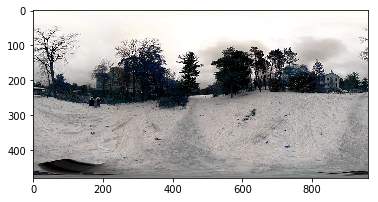

In [ ]:
plt.imshow(image)
plt.show()

In [ ]:
img = Equirectangular('101.jpeg')

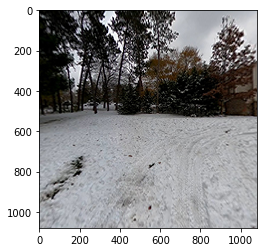

In [ ]:
pers = img.GetPerspective(90, 90, 0, 1080, 1080, 128)
plt.imshow(cv2.cvtColor(pers, cv2.COLOR_BGR2RGB))
plt.show()

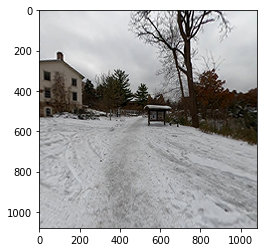

In [ ]:
pers = img.GetPerspective(90, 180, 0, 1080, 1080, 128)
plt.imshow(cv2.cvtColor(pers, cv2.COLOR_BGR2RGB))
plt.show()

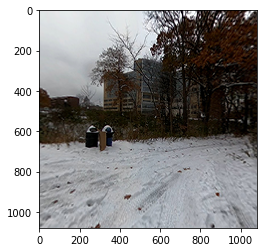

In [ ]:
pers = img.GetPerspective(90, 270, 0, 1080, 1080, 128)
plt.imshow(cv2.cvtColor(pers, cv2.COLOR_BGR2RGB))
plt.show()

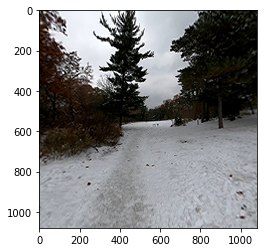

In [ ]:
pers = img.GetPerspective(90, 360, 0, 1080, 1080, 128)
plt.imshow(cv2.cvtColor(pers, cv2.COLOR_BGR2RGB))
plt.show()

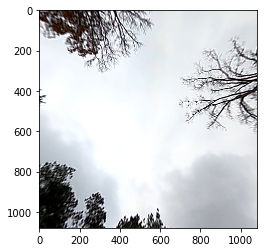

In [ ]:
pers = img.GetPerspective(90, 90, 90, 1080, 1080, 128)
plt.imshow(cv2.cvtColor(pers, cv2.COLOR_BGR2RGB))
plt.show()

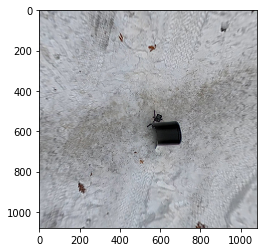

In [ ]:
pers = img.GetPerspective(90, 90, -90, 1080, 1080, 128)
plt.imshow(cv2.cvtColor(pers, cv2.COLOR_BGR2RGB))
plt.show()